Config 8 - 2023 DC vs Other Markets Test (Per MW, 95% CI)
Sample size: 365 days

=== Config 8 - 2023 DC vs Other Markets Results ===
Comparison  Mean DC profits per MW  Mean DAM or IDM profits per MW  Std of DC profits per MW  Std of DAM or IDM profits per MW  t statistic p value  Levene F value Levene p value
 DC vs DAM                  113.85                           98.96                     64.17                             61.21        3.202 0.00143           0.000        0.99646
 DC vs IDM                  113.85                          111.61                     64.17                             82.20        0.409 0.68288           9.438        0.00220


/var/folders/hh/yly126sx0nv7wh7rwnh8n_pm0000gn/T/ipykernel_89187/3551287805.py:89: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


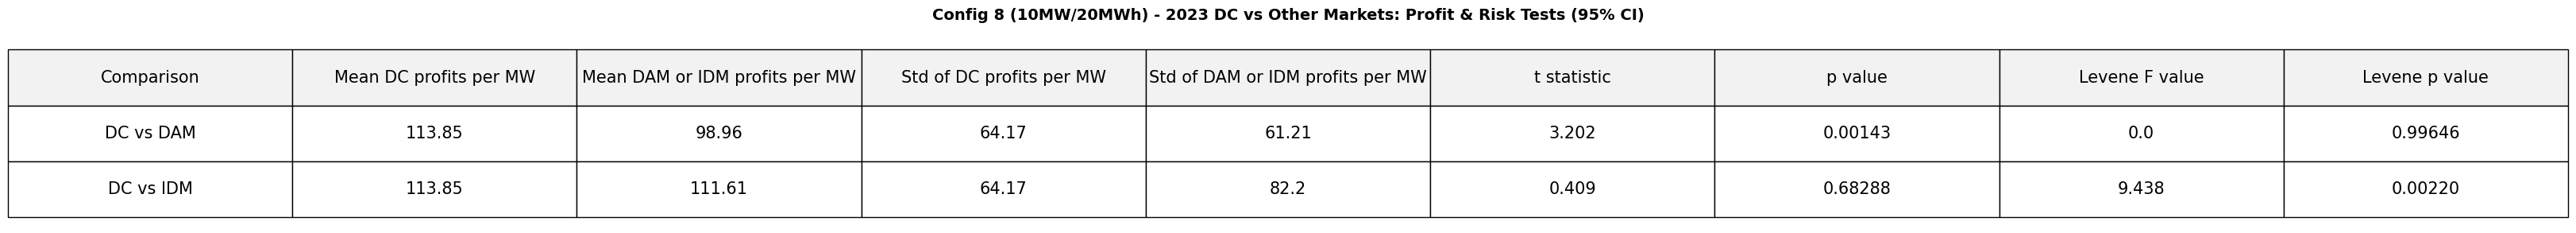

In [113]:
'''Config 8 - DC vs Other Markets in 2023: Profit and Risk Tests'''
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Test Config 8 in 2023
config = 8
year = 2023
power_capacity = 10  # MW for Config 8 (10MW/20MWh)

def format_p(p):
    return "<0.00001" if p < 0.00001 else f"{p:.5f}"

try:
    df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Results EDA/{year}_ST profit (config {config}).csv')
    
    # Normalize to per MW
    dam_profits = df['DAM_Profit'].dropna().values / power_capacity
    idm_profits = df['IDM_Profit'].dropna().values / power_capacity  
    dc_profits = df['DC_Profit'].dropna().values / power_capacity
    
    print(f"Config 8 - 2023 DC vs Other Markets Test (Per MW, 95% CI)")
    print(f"Sample size: {len(dc_profits)} days")
    
    # Results list for table
    results = []
    
    # DC vs DAM tests
    # Welch's t-test (two-tailed) for profit difference
    t_stat_dam, t_p_dam = stats.ttest_ind(dc_profits, dam_profits, equal_var=False)
    # Levene's test for variance difference
    levene_stat_dam, levene_p_dam = stats.levene(dc_profits, dam_profits)
    
    results.append({
        'Comparison': 'DC vs DAM',
        'Mean DC profits per MW': round(np.mean(dc_profits), 2),
        'Mean DAM or IDM profits per MW': round(np.mean(dam_profits), 2),
        'Std of DC profits per MW': round(np.std(dc_profits), 2),
        'Std of DAM or IDM profits per MW': round(np.std(dam_profits), 2),
        't statistic': round(t_stat_dam, 3),
        'p value': format_p(t_p_dam),
        'Levene F value': round(levene_stat_dam, 3),
        'Levene p value': format_p(levene_p_dam),
    })
    
    # DC vs IDM tests
    # Welch's t-test (two-tailed) for profit difference
    t_stat_idm, t_p_idm = stats.ttest_ind(dc_profits, idm_profits, equal_var=False)
    # Levene's test for variance difference
    levene_stat_idm, levene_p_idm = stats.levene(dc_profits, idm_profits)
    
    results.append({
        'Comparison': 'DC vs IDM',
        'Mean DC profits per MW': round(np.mean(dc_profits), 2),
        'Mean DAM or IDM profits per MW': round(np.mean(idm_profits), 2),
        'Std of DC profits per MW': round(np.std(dc_profits), 2),
        'Std of DAM or IDM profits per MW': round(np.std(idm_profits), 2),
        't statistic': round(t_stat_idm, 3),
        'p value': format_p(t_p_idm),
        'Levene F value': round(levene_stat_idm, 3),
        'Levene p value': format_p(levene_p_idm),
    })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    print("\n=== Config 8 - 2023 DC vs Other Markets Results ===")
    print(results_df.to_string(index=False))
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(16, 3))
    ax.axis('off')
    
    # Create table
    table = ax.table(
        cellText=results_df.values,
        colLabels=results_df.columns,
        cellLoc='center',
        loc='center',
        colColours=['#f2f2f2']*len(results_df.columns)
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(15)
    table.scale(2.6, 4.2)
    
    plt.title("Config 8 (10MW/20MWh) - 2023 DC vs Other Markets: Profit & Risk Tests (95% CI)", pad=20, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print(f"2023 profit data file not found for Config 8")

2024 DC vs Other Markets Test (Config 1, Per MW, 95% CI)
Sample size: 366 days

=== 2024 DC vs Other Markets Test Results ===
Comparison  Mean DC profits per MW  Mean DAM or IDM profits per MW   n  t_statistic  p_value
 DC vs DAM                   79.79                           44.69 366       13.171 <0.00001
 DC vs IDM                   79.79                           47.27 366       11.104 <0.00001


/var/folders/hh/yly126sx0nv7wh7rwnh8n_pm0000gn/T/ipykernel_89187/3840402576.py:86: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


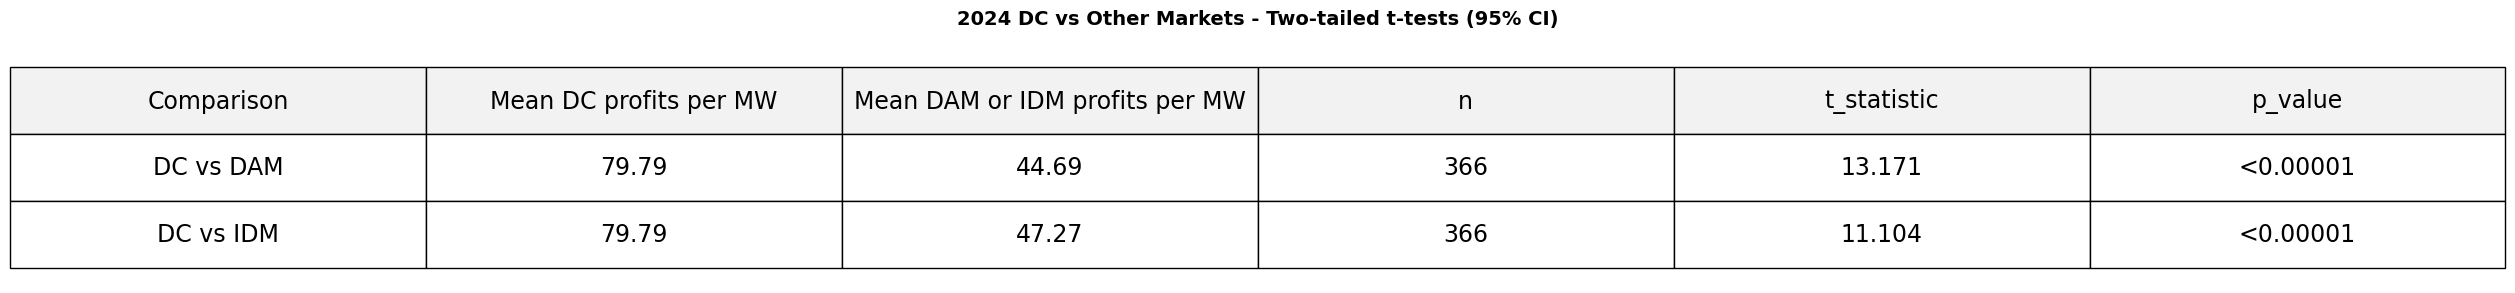

In [62]:
'''Test if DC profits are significantly different from DAM and IDM profits in 2024'''
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load 2024 data for Config 1
config = 1
year = 2024
power_capacity = 10  # MW for normalization

def format_p(p):
    return "<0.00001" if p < 0.00001 else f"{p:.5f}"

def cohens_d(x, y):
    pooled_std = np.sqrt(((len(x) - 1) * np.var(x, ddof=1) + (len(y) - 1) * np.var(y, ddof=1)) / (len(x) + len(y) - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

try:
    df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Results EDA/Results for EDA/config_{config}_daily_profits_{year}.csv')
    
    # Normalize to per MW
    dam_profits = df['DAM_Daily_Profit'].dropna().values / power_capacity
    idm_profits = df['IDM_Daily_Profit'].dropna().values / power_capacity  
    dc_profits = df['DC_Daily_Profit'].dropna().values / power_capacity
    
    print(f"2024 DC vs Other Markets Test (Config 1, Per MW, 95% CI)")
    print(f"Sample size: {len(dc_profits)} days")
    
    # Results list for table
    results = []
    
    # DC vs DAM (two-tailed test)
    t_stat_dam, p_val_dam = stats.ttest_ind(dc_profits, dam_profits, equal_var=False)
    d_dam = cohens_d(dc_profits, dam_profits)
    significant_dam = "Yes" if p_val_dam < 0.05 else "No"
    
    results.append({
        'Comparison': 'DC vs DAM',
        'Mean DC profits per MW': round(np.mean(dc_profits), 2),
        'Mean DAM or IDM profits per MW': round(np.mean(dam_profits), 2),
        'n': len(dc_profits),
        't_statistic': round(t_stat_dam, 3),
        'p_value': format_p(p_val_dam),
    })
    
    # DC vs IDM (two-tailed test) 
    t_stat_idm, p_val_idm = stats.ttest_ind(dc_profits, idm_profits, equal_var=False)
    d_idm = cohens_d(dc_profits, idm_profits)
    significant_idm = "Yes" if p_val_idm < 0.05 else "No"
    
    results.append({
        'Comparison': 'DC vs IDM',
        'Mean DC profits per MW': round(np.mean(dc_profits), 2),
        'Mean DAM or IDM profits per MW': round(np.mean(idm_profits), 2),
        'n': len(dc_profits),
        't_statistic': round(t_stat_idm, 3),
        'p_value': format_p(p_val_idm),
    })
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    
    print("\n=== 2024 DC vs Other Markets Test Results ===")
    print(results_df.to_string(index=False))
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(14, 3))
    ax.axis('off')
    
    # Create table
    table = ax.table(
        cellText=results_df.values,
        colLabels=results_df.columns,
        cellLoc='center',
        loc='center',
        colColours=['#f2f2f2']*len(results_df.columns),
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(17)
    table.scale(2.3, 4.0)
    

    plt.title("2024 DC vs Other Markets - Two-tailed t-tests (95% CI)", pad=20, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print("2024 profit data file not found for Config 1")


=== DC vs DAM/IDM Profit Variance Comparison by Year ===
 Year  DC Std  DAM Std  IDM Std  Levene DC vs DAM stat Levene DC vs DAM p  Levene DC vs IDM stat Levene DC vs IDM p
 2022  310.77   140.76    93.86                172.297           <0.00001                211.183           <0.00001
 2023   64.17    31.66    44.18                 46.431           <0.00001                 15.524            0.00009
 2024   40.26    31.16    38.86                  7.112            0.00783                  0.651            0.42014


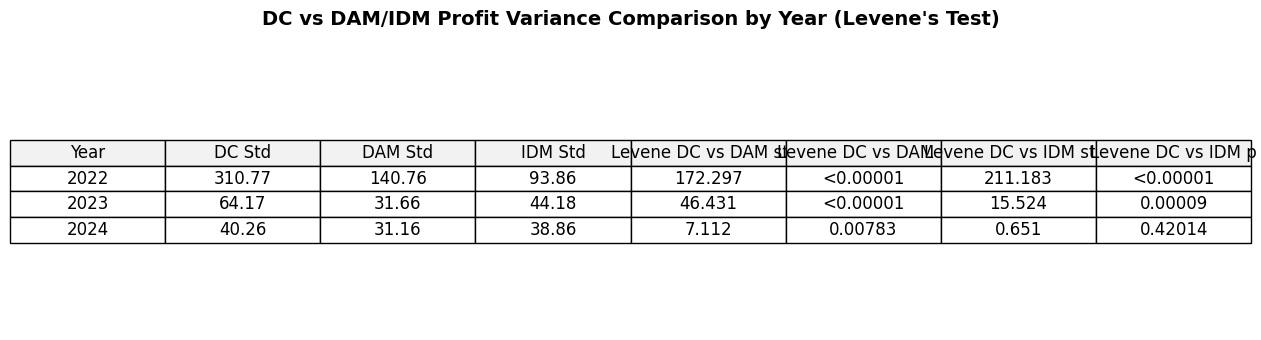

In [63]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

years = [2022, 2023, 2024]
config = 1
power_capacity = 10  # MW

def format_p(p):
    return "<0.00001" if p < 0.00001 else f"{p:.5f}"

results = []

for year in years:
    try:
        df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Results EDA/Results for EDA/config_{config}_daily_profits_{year}.csv')
        dam = df['DAM_Daily_Profit'].dropna().values / power_capacity
        idm = df['IDM_Daily_Profit'].dropna().values / power_capacity
        dc = df['DC_Daily_Profit'].dropna().values / power_capacity

        # Levene's test for DC vs DAM
        levene_stat_dam, levene_p_dam = stats.levene(dc, dam)
        # Levene's test for DC vs IDM
        levene_stat_idm, levene_p_idm = stats.levene(dc, idm)

        results.append({
            'Year': year,
            'DC Std': round(np.std(dc), 2),
            'DAM Std': round(np.std(dam), 2),
            'IDM Std': round(np.std(idm), 2),
            'Levene DC vs DAM stat': round(levene_stat_dam, 3),
            'Levene DC vs DAM p': format_p(levene_p_dam),
            'Levene DC vs IDM stat': round(levene_stat_idm, 3),
            'Levene DC vs IDM p': format_p(levene_p_idm),
        })
    except FileNotFoundError:
        print(f"File not found for year {year}")

results_df = pd.DataFrame(results)

print("\n=== DC vs DAM/IDM Profit Variance Comparison by Year ===")
print(results_df.to_string(index=False))

# Plot as table
fig, ax = plt.subplots(figsize=(14, 2 + 0.5 * len(results_df)))
ax.axis('off')
table = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2']*len(results_df.columns)
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.5)

plt.title("DC vs DAM/IDM Profit Variance Comparison by Year (Levene's Test)", pad=20, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


=== Statistical Test Results Table ===
  Market  Year A  Year B     n  t statistic   p value  Levene F statistic  \
0    DAM    2022    2023  8758       88.272  <0.00001            2745.837   
1    DAM    2022    2024  8758      107.348  <0.00001            3700.470   
2    DAM    2023    2024  8758       44.165  <0.00001             462.155   
3    IDM    2022    2023  8758       86.617  <0.00001            3009.847   
4    IDM    2022    2024  8758      107.082  <0.00001            4283.465   
5    IDM    2023    2024  8758       40.122  <0.00001             458.543   

  Levene p value  
0       <0.00001  
1       <0.00001  
2       <0.00001  
3       <0.00001  
4       <0.00001  
5       <0.00001  


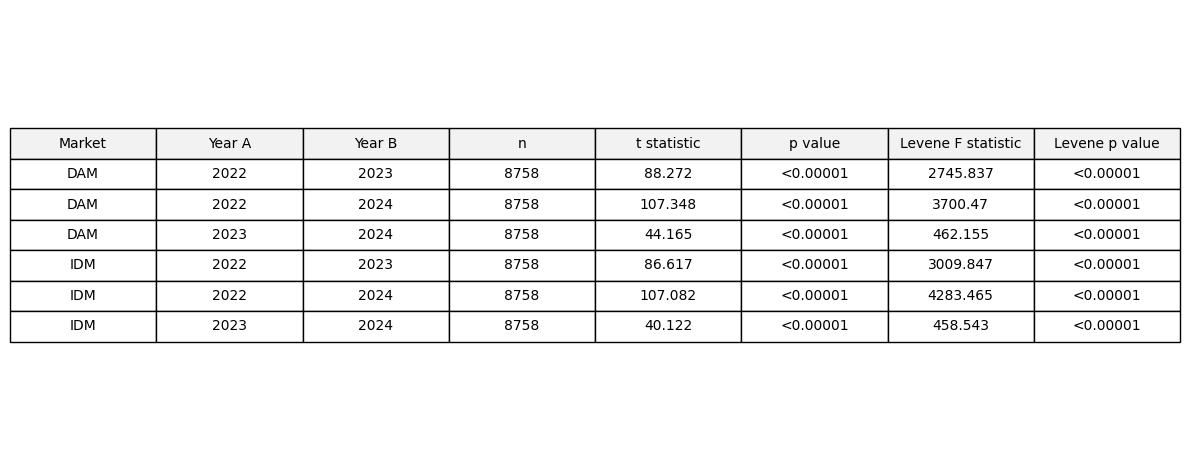

In [45]:
'''DAM IDM prices test'''
import pandas as pd
import numpy as np
from scipy import stats

years = [2022, 2023, 2024]
dam_yearly = {}
idm_yearly = {}

# Load data for each year
for year in years:
    df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Cleaned market prices/DAM & IDM/{year} DAM IDM Price.csv')
    dam_yearly[year] = df['DAM price'].dropna().values
    idm_yearly[year] = df['IDM price'].dropna().values

# Store results in a list of dicts
results = []

def format_p(p):
    return "<0.00001" if p < 1e-5 else round(p, 5)

for test_type, yearly_data in [("DAM", dam_yearly), ("IDM", idm_yearly)]:
    for i in range(len(years)):
        for j in range(i+1, len(years)):
            y1, y2 = years[i], years[j]
            d1, d2 = yearly_data[y1], yearly_data[y2]

            # Welch’s t-test
            t_stat, p_val = stats.ttest_ind(d1, d2, equal_var=False)
            # Levene’s test
            levene_stat, levene_p = stats.levene(d1, d2)

            results.append({
                "Market": test_type,
                "Year A": y1,
                "Year B": y2,
                "n": len(d1),
                "t statistic": round(t_stat, 3),
                "p value": format_p(p_val),
                "Levene F statistic": round(levene_stat, 3),
                "Levene p value": format_p(levene_p),
            })

# Convert to DataFrame
result_df = pd.DataFrame(results)

# Optional: display
print("\n=== Statistical Test Results Table ===")
print(result_df)

import matplotlib.pyplot as plt

# Plot the result table as a figure
fig, ax = plt.subplots(figsize=(12, 3 + 0.3 * len(result_df)))
ax.axis('off')  # turn off axis

# Create the table
table = ax.table(
    cellText=result_df.values,
    colLabels=result_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2']*len(result_df.columns)
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.5)  # Adjust row height

# Optional: Save figure
# plt.savefig("stat_results_table_plot.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


/var/folders/hh/yly126sx0nv7wh7rwnh8n_pm0000gn/T/ipykernel_89187/3678173149.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


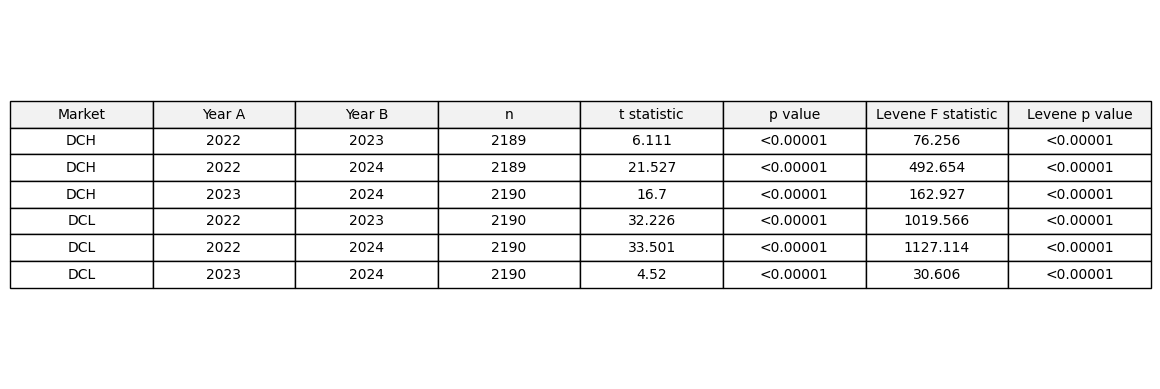

In [44]:
'''DC prices test'''
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

years = [2022, 2023, 2024]
dch_yearly = {}
dcl_yearly = {}


# Load DCH and DCL data for each year
for year in years:
    dch_df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Cleaned market prices/DC/DCH/{year} DCH Price.csv')
    dcl_df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Cleaned market prices/DC/DCL/{year} DCL Price.csv')
    dch_yearly[year] = dch_df['Clearing Price'].dropna().values
    dcl_yearly[year] = dcl_df['Clearing Price'].dropna().values

# Helper for formatting p-values
def format_p(p):
    return "<0.00001" if p < 0.00001 else f"{p:.5f}"

# Compile results
results = []
for label, dataset in [("DCH", dch_yearly), ("DCL", dcl_yearly)]:
    for i in range(len(years)):
        for j in range(i + 1, len(years)):
            y1, y2 = years[i], years[j]
            x1, x2 = dataset[y1], dataset[y2]
            t_stat, p_val = stats.ttest_ind(x1, x2, equal_var=False)
            levene_stat, levene_p = stats.levene(x1, x2)
            results.append({
                "Market": label,
                "Year A": y1,
                "Year B": y2,
                "n": min(len(x1), len(x2)),
                "t statistic": round(t_stat, 3),
                "p value": format_p(p_val),
                "Levene F statistic": round(levene_stat, 3),
                "Levene p value": format_p(levene_p)
            })

df = pd.DataFrame(results)

# Plotting as table
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f2f2f2']*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.3, 1.6)

plt.tight_layout()
plt.show()


Loaded Config 1 - 2022: 365 days (normalized to per MW)
Loaded Config 1 - 2023: 365 days (normalized to per MW)
Loaded Config 1 - 2024: 366 days (normalized to per MW)

=== Config 1 Market Comparison Within Each Year - Per MW Basis (9 tests) ===
 Year Market_A Market_B   n  Mean_A_per_MW  Mean_B_per_MW  Std_A_per_MW  Std_B_per_MW  Welch_t  Welch_p  Levene_F Levene_p
 2022      DAM      IDM 365         119.66         114.93        140.76         93.86    0.533  0.59396     0.062  0.80384
 2022      DAM       DC 365         119.66         411.47        140.76        310.77  -16.319 <0.00001   172.297 <0.00001
 2022      IDM       DC 365         114.93         411.47         93.86        310.77  -17.428 <0.00001   211.183 <0.00001
 2023      DAM      IDM 365          52.62          60.64         31.66         44.18   -2.815  0.00503    10.738  0.00110
 2023      DAM       DC 365          52.62         113.85         31.66         64.17  -16.324 <0.00001    46.431 <0.00001
 2023      IDM  

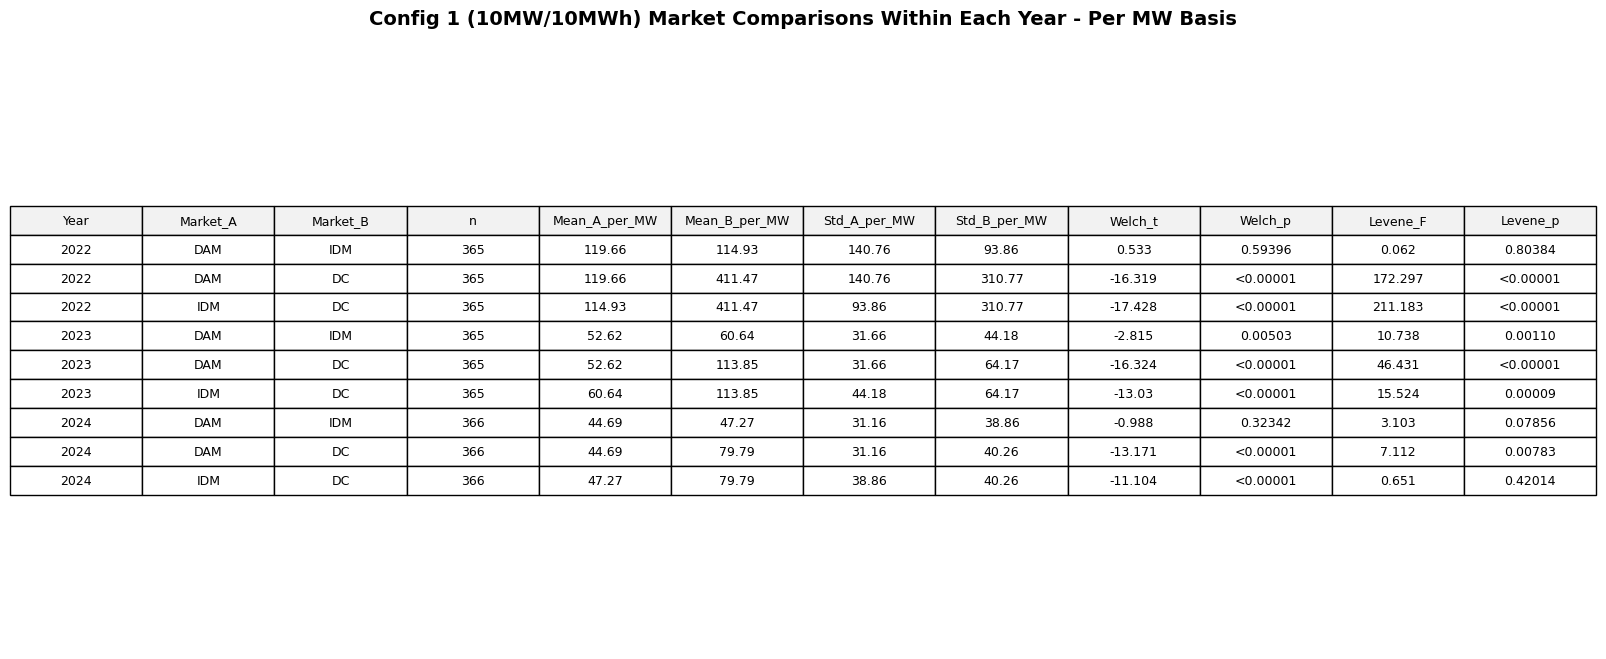

In [35]:
'''BESS Profit Statistical Tests Between Markets Within Each Year - Config 1 (Per MW)'''
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Test Config 1 only - normalize to per MW (divide by 10MW capacity)
config = 1
power_capacity = 10  # MW
years = [2022, 2023, 2024]
markets = ['DAM_Daily_Profit', 'IDM_Daily_Profit', 'DC_Daily_Profit']
market_names = ['DAM', 'IDM', 'DC']

# Helper function for p-value formatting
def format_p(p):
    return "<0.00001" if p < 0.00001 else f"{p:.5f}"

results = []

# Load data for all years for Config 1
yearly_data = {}

for year in years:
    try:
        df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Results EDA/Results for EDA/config_{config}_daily_profits_{year}.csv')
        # Convert to per MW by dividing by power capacity
        df[markets] = df[markets] / power_capacity
        yearly_data[year] = df
        print(f"Loaded Config {config} - {year}: {len(df)} days (normalized to per MW)")
    except FileNotFoundError:
        print(f"File not found: Config {config} - {year}")

# For each year, compare markets pairwise
for year in years:
    if year not in yearly_data:
        continue
        
    df = yearly_data[year]
    
    # Compare each pair of markets within this year
    for i in range(len(markets)):
        for j in range(i+1, len(markets)):
            market1, market2 = markets[i], markets[j]
            name1, name2 = market_names[i], market_names[j]
            
            # Extract market data for this year (already per MW)
            data1 = df[market1].dropna().values
            data2 = df[market2].dropna().values
            
            if len(data1) == 0 or len(data2) == 0:
                continue
            
            # Welch's t-test (unequal variances)
            t_stat, t_p = stats.ttest_ind(data1, data2, equal_var=False)
            
            # Levene's test for variance equality
            levene_stat, levene_p = stats.levene(data1, data2)
            
            results.append({
                'Year': year,
                'Market_A': name1,
                'Market_B': name2,
                'n': len(data1),  # Same for both since same days
                'Mean_A_per_MW': round(np.mean(data1), 2),
                'Mean_B_per_MW': round(np.mean(data2), 2),
                'Std_A_per_MW': round(np.std(data1), 2),
                'Std_B_per_MW': round(np.std(data2), 2),
                'Welch_t': round(t_stat, 3),
                'Welch_p': format_p(t_p),
                'Levene_F': round(levene_stat, 3),
                'Levene_p': format_p(levene_p)
            })

# Convert to DataFrame
results_df = pd.DataFrame(results)

if len(results_df) > 0:
    print(f"\n=== Config 1 Market Comparison Within Each Year - Per MW Basis ({len(results_df)} tests) ===")
    print(results_df.to_string(index=False))
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(16, 4 + 0.3 * len(results_df)))
    ax.axis('off')
    
    # Create table
    table = ax.table(
        cellText=results_df.values,
        colLabels=results_df.columns,
        cellLoc='center',
        loc='center',
        colColours=['#f2f2f2']*len(results_df.columns)
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    plt.title("Config 1 (10MW/10MWh) Market Comparisons Within Each Year - Per MW Basis", pad=20, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
else:
    print("No data found for Config 1 market comparison tests.")


=== DC Rolling Variance Ratio Change Welch's t-test Results ===
Comparison  Average Rolling Variance Ratio \n(2024)  Average Rolling Variance Ratio \n(2022-2023)   n  t statistic  p value
 DC vs DAM                                    1.259                                        35.426 366      -13.236 <0.00001
 DC vs IDM                                    0.805                                        16.686 366      -14.630 <0.00001


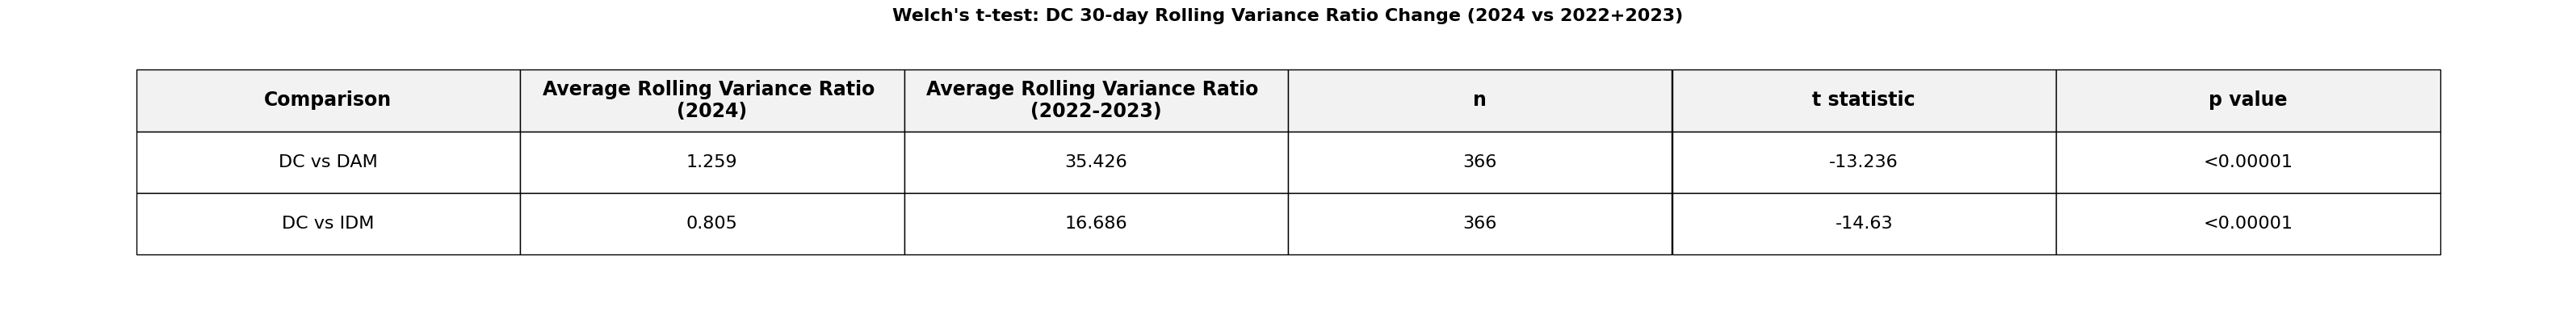

In [138]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def format_p(p):
    return "<0.00001" if p < 0.00001 else f"{p:.5f}"

# Load daily profit data for Config 1 for 2022, 2023, 2024
def load_returns(year):
    df = pd.read_csv(f'/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Results EDA/{year}_ST profit (config 1).csv')
    dam = df['DAM_Profit'] / 10
    idm = df['IDM_Profit'] / 10
    dc = df['DC_Profit'] / 10
    dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Day_of_Year'].astype(str), format='%Y-%j')
    dam.index = dates
    idm.index = dates
    dc.index = dates
    return dc, dam, idm

# Load all years and concatenate
dc_returns, dam_returns, idm_returns = [], [], []
for year in [2022, 2023, 2024]:
    dc, dam, idm = load_returns(year)
    dc_returns.append(dc)
    dam_returns.append(dam)
    idm_returns.append(idm)
dc_returns = pd.concat(dc_returns).sort_index()
dam_returns = pd.concat(dam_returns).sort_index()
idm_returns = pd.concat(idm_returns).sort_index()

# 1. Compute 30-day rolling variance
dc_var = dc_returns.rolling(window=30, min_periods=30).var()
dam_var = dam_returns.rolling(window=30, min_periods=30).var()
idm_var = idm_returns.rolling(window=30, min_periods=30).var()

# 2. Compute daily relative variance ratios
ratio_dc_dam = dc_var / dam_var
ratio_dc_idm = dc_var / idm_var

# 3. Slice ratios by year
ratio_dc_dam_2022 = ratio_dc_dam[ratio_dc_dam.index.year == 2022].dropna()
ratio_dc_dam_2023 = ratio_dc_dam[ratio_dc_dam.index.year == 2023].dropna()
ratio_dc_dam_2024 = ratio_dc_dam[ratio_dc_dam.index.year == 2024].dropna()

ratio_dc_idm_2022 = ratio_dc_idm[ratio_dc_idm.index.year == 2022].dropna()
ratio_dc_idm_2023 = ratio_dc_idm[ratio_dc_idm.index.year == 2023].dropna()
ratio_dc_idm_2024 = ratio_dc_idm[ratio_dc_idm.index.year == 2024].dropna()

# 4. Combine 2022 and 2023 into baseline
baseline_dc_dam = pd.concat([ratio_dc_dam_2022, ratio_dc_dam_2023])
baseline_dc_idm = pd.concat([ratio_dc_idm_2022, ratio_dc_idm_2023])

# 5. Welch's t-test for DC/DAM risk ratio change
t_stat_dam, p_val_dam = stats.ttest_ind(ratio_dc_dam_2024, baseline_dc_dam, equal_var=False)
# Welch's t-test for DC/IDM risk ratio change
t_stat_idm, p_val_idm = stats.ttest_ind(ratio_dc_idm_2024, baseline_dc_idm, equal_var=False)

# 6. Prepare results for table (styled like your example)
table_data = [
    ["DC vs DAM", round(np.mean(ratio_dc_dam_2024), 3), round(np.mean(baseline_dc_dam), 3),
     len(ratio_dc_dam_2024), round(t_stat_dam, 3), format_p(p_val_dam)],
    ["DC vs IDM", round(np.mean(ratio_dc_idm_2024), 3), round(np.mean(baseline_dc_idm), 3),
     len(ratio_dc_idm_2024), round(t_stat_idm, 3), format_p(p_val_idm)]
]
columns = ["Comparison", "Average Rolling Variance Ratio \n(2024)", "Average Rolling Variance Ratio \n(2022-2023)", "n", "t statistic", "p value"]

results_df = pd.DataFrame(table_data, columns=columns)

# Print for reference
print("\n=== DC Rolling Variance Ratio Change Welch's t-test Results ===")
print(results_df.to_string(index=False))

# ...existing code...

fig, ax = plt.subplots(figsize=(32, 4))  # Wider and taller figure
ax.axis('off')
table = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2']*len(results_df.columns),
    bbox=[0.05, 0.2, 0.9, 0.7]  # More space for table
)
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(8, 8)  # Wider columns, taller rows

# Bold header
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_fontsize(17)
        cell.set_text_props(weight='bold')
    cell.set_edgecolor('black')

plt.title("Welch's t-test: DC 30-day Rolling Variance Ratio Change (2024 vs 2022+2023)", pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()